# Parte Computacional

In [ ]:
#bibliotecas
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

# **(b)** 
Com os coeficientes obtidos anteriormente, implemente um programa que aproxime a onda “Dente de Serra” (Figura 1) pela sua série de Fourier com N harmônicas:

$\tilde{x}_N(t)=\sum_{k=-N}^{N}a_ke^{jkw_0t}$

De posse do programa, exiba, em gráficos diferentes, a onda “dente de serra” dada por $x(t) = 2t/T$, para $-T/2 < t \leq T/2 $ junto com sua aproximação dada pela série de Fourier com os valores $N = 1,\ 10,\ 20,\ 50$, para um período do sinal. Procure usar cores distintas para cada uma das séries obtidas, bem como para a onda “dente de serra”.

Neste item, portanto, devem ser gerados quatro gráficos, sendo que cada gráfico mostrará duas curvas: a onda “dente de serra” e a aproximação em série de Fourier para o valor adotado de $N$.

![](https://drive.google.com/uc?export=view&id=1Hya0fj1VYtbBAUkmDDEKrG_T7DwkoZAY)

## Código

In [ ]:
def fSeries(N):
  '''
  Função que aproxima uma onda pela sua Série de Fourier com N harmônicas. O
  período da série é T=4s e haveráá cerca de 20000 amostras entre (-2 < t <= 2)
  Input: N harmônicas
  Output: aproximação por Série de Fourier
  '''

  j = np.complex(0,1)                                                  #criando o número complexo j
  
  T = 4                                                                #período
  w_0 = 2*math.pi/T                                                    #Ômega zero
  t = np.arange(-2,2, 0.0002)                                          #número de amostras
  sum = []                                                             #somatório de Fourier para cada t

  for i in t:                                                          #para cada amostra
    s = 0                                                              #soma de Fourier
    for k in range(-N, N + 1):                                         #para cada harmônica
      if k != 0:                                                       #se não for o termo A_0
        s += ((j*(-1)**k)/(k*math.pi))*cmath.exp(j*k*w_0*i)            #alteramos a soma (ak*exp(j*k*w_0*t)) 
    sum.append(s)                                                      #adicionamos no vetor que conterá as somas para cada t
  
  return sum                                                           #retornamos a soma



In [ ]:
def dSerra():
  '''
  Função Dente de Serra
  Input: void
  Output: retorna a função Dente de Serra conforme o enunciado do problema
  '''

  T = 4                         #período T = 4s
  t = np.arange(-2,2, 0.0002)   #número de amostras

  return 2*t/T, t               #retorno da função dente de serra


In [ ]:
def fSeriesGraphic(N):
  '''
  Função que retorna o gráfico da aproximação dada por uma Série de Fourier com 
  N harmônicas na função Dente de Serra
  Input: N harmônicas
  Output: gráfico da aproximação por Série de Fourier
  '''

  n = fSeries(N)                #aproximação por Fourier
  t = np.arange(-2,2, 0.0002)   #número de amostras
  y_serra, x_serra = dSerra()   #Dente de Serra
  
  #plotagem dos gráficos
  plt.title("Aproximação por Série de Fourier com " + str(N) + " harmônicas")
  plt.xlabel("$t$")
  plt.ylabel("Dente de Serra e Aproximação por Série de Fourier")
  plt.plot(t, n, color = 'r', label = "Aproximação com " + str(N) + " harmônicas")
  plt.plot(x_serra, y_serra, color = 'b', label = "Dente de Serra")
  plt.legend()
  plt.grid()
  plt.show()

Para N = 1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


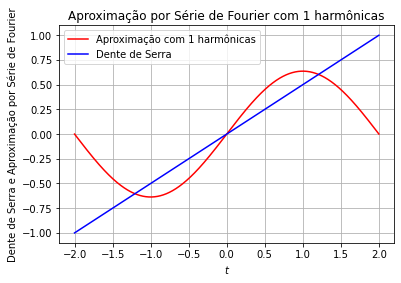

In [ ]:
fSeriesGraphic(1)

Para N = 10

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


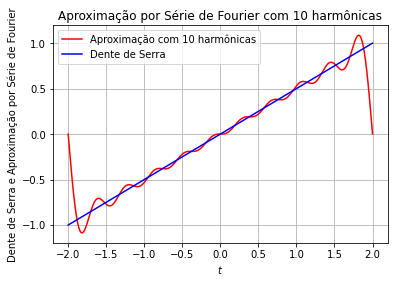

In [ ]:
fSeriesGraphic(10)

Para N = 20

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


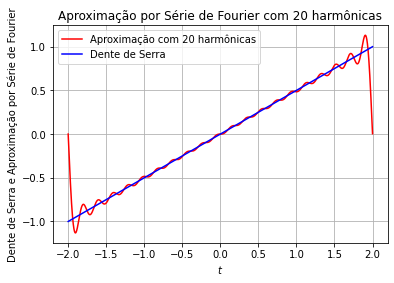

In [ ]:
fSeriesGraphic(20)

Para N = 50

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


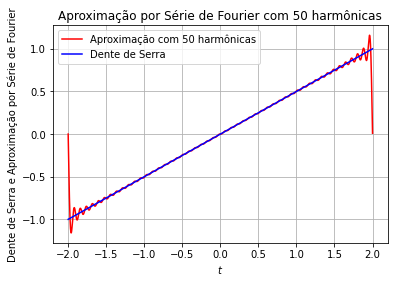

In [ ]:
fSeriesGraphic(50)

## Discussão letra **(b)**

Observamos que conforme aumenta-se o número das harmônicas, a aproximação por Série de Fourier se torna cda vez mais parecida com a função Dente de Serra. Outro fator importante nesta análise é o Fenômeno de Gibbs, dado em razão da dificuldade de aproximar funções descontínuas a finitas séries de ondas senos e cossenos, fazendo com que as descontinuidades apresentem essas ocilações observadas nos gráficos.

# **(c)**
Para cada um dos valores de $N$ do item anterior, calcule a potência média do erro $P_N$:

$P_N=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} (x(t)-\tilde{x}_N(t))^2\, dt$

Uma vez que estamos lidando com representações discretas dos sinais, a potêcia pode ser aproximada através da média temporal de $(x(t)-\tilde{x}_N(t))^2$

## Código

In [ ]:
def pErro(N):
  '''
  Função que calcula a potência média do erro
  Input: função Dente de Serra e número de harmônicas a ser analisado
  Output: potência média do erro
  '''

  T = 4                               #período
  n = fSeries(N)                      #aproximação por Fourier
  t = np.arange(-2,2, 0.0002)         #número de amostras
  x_serra, _ = dSerra()               #Dente de Serra

  erro = 0                            #valor do erro

  for i in range(len(t)):
    erro += (x_serra[i] - n[i])**2    #cálculo do erro
  
  erro = erro.real
  erro = erro/(T*len(t))                 #dividindo pelo período*número de amostras

  return erro

Para N = 1

In [ ]:
pErro(1)

0.032672742762140515

Para N = 10

In [ ]:
pErro(10)

0.004821191637059799

Para N = 20

In [ ]:
pErro(20)

0.0024707758368129476

Para N = 50

In [ ]:
pErro(50)

0.0010031893434776684

## Discussão letra **(c)**
Os erros encontrados para cada harmônica foram:

    Harônica |        Erro
    ---------|----------------------
    N = 1    | 0.032672742762140515
    N = 10   | 0.004821191637059799
    N = 20   | 0.0024707758368129476
    N = 50   | 0.0010031893434776684

Disso, podemos concluir que, conforme se aumenta o número de harmônicas, menor o erro fica.


# **(d)**

Para $N = 50$, plote o módulo dos coeficientes da série $|a_k|$ em função de $ω$ e discuta a simetria observada.

Como queremos plotar uma sequência de valores discretos, utilize o comando `stem()`.

## Código

In [ ]:
def coef_ak_w(N):
  '''
  Função que retorna o módulo dos coeficientes da série |ak| em função de ω
  Input: número de harmônicas N
  Output: coeficientes ak e ω referentes a harmônica N dada como entrada
  '''

  j = np.complex(0,1)                             #criando o número complexo j
  T = 4                                           #período
  w_0 = 2*math.pi/T                               #Ômega zero


  ak = []                                         #vetor dos coeficientes ak
  w = []                                          #vetor dos ω

  for k in range(-N, N + 1):                      #para k variando de -N a N
    w.append(w_0*k)                               #valor de ω para cada k
    if k != 0:                                    #se k não for zero
      ak.append(abs(((j*(-1)**k)/(k*math.pi))))   #valor de ak para cada k
    if k == 0:                                    #se k for zero
      ak.append(0)                                #ak = 0
  
  return ak, w

In [ ]:
def plot_ak_w(N):
  '''
  Função que plota ak em função de ω
  Input: número de harmônicas N
  Output: plot de ak em função de ω
  '''

  ak, w = coef_ak_w(N)

  plt.figure(figsize = (10,6))
  markerline2, stemlines2, _ = plt.stem(w, ak, label='$a_k$')
  plt.setp(markerline2, 'markerfacecolor', 'b')
  plt.setp(stemlines2, 'color', 'b')
  plt.legend()
  plt.xlabel('$ω$')
  plt.ylabel('$a_k$')
  plt.title('Gráfico de $a_k$ em função de $ω$')
  plt.grid()
  plt.show()

Para N = 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


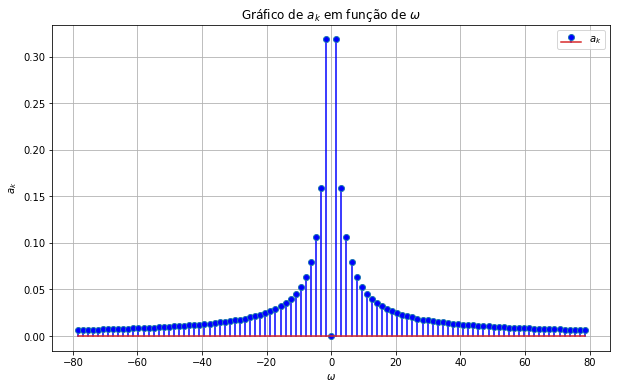

In [ ]:
plot_ak_w(50)

## Discussão letra **(d)**

A partir do gráfico plotado, podemos observar uma simetria em realção ao eixo vertical: $a_k[-\omega]=a_k[\omega]$. Tal ocorrência se deve ao fato de que a função que os coeficientes $a_k$ descrevem é par, portanto, $x(t)$ também é uma função par.

# **(e)**
Considere o circuito analógico mostrado na Figura 2, que corresponde a um sistema LIT cuja resposta em frequência é dada por $H(jω) = \frac{1}{1-j(\frac{\omega_c}{\omega})}$, onde $ω_c = \frac{1}{RC}$ é a frequência de corte do filtro (em rad/s). Plote o módulo e a fase da resposta em frequência e discuta a ação deste sistema como um filtro. (Dica: utilize os comandos `abs(·)` e `np.angle(·)`).

![](https://drive.google.com/uc?export=view&id=1cS1MJpCARfphxWnbNRwMwI0nM31c8inr)

## Código

In [ ]:
def H_circuit(R, C, N):
  '''
  Função que calcula a resposta em frequência do circuito da Figura 2
  Input: valor da resistência R, valor do capicitor C e o número de harmônicas
  Output: retorna a resposta em frequência H do circuito e ω caracterizado por R, C e N harmônicas
  '''

  j = np.complex(0,1)                             #criando o número complexo j
  T = 4                                           #período
  w_0 = 2*math.pi/T                               #Ômega zero
  w_c = 1/(R*C)                                   #valor de w_c com base nas entradas

  w = []                                          #vetor que conterá ω
  H = []                                          #vetor que conterá as respostas em frequência

  for k in range(-N, N + 1):                      #para cada k
    w.append(w_0*k)                               #w recebe w_0*k

  for k in range(0, 2*N + 1):                      #para cada k
    if w[k] != 0:                                 #se w[k] for diferente de zero
      H.append(1/(1-(j*(w_c/w[k]))))              #H recebe o valor conforme a equação dada no enunciado
    else:                                         #se w[k] for igual a zero
      H.append(0)                                 #H recebe zero
  
  return H, w

In [ ]:
def plot_H_w(R, C, N):
  '''
  Função que plota H em função de ω
  Input: H e ω
  Output: plot de H em função de ω
  '''

  H, w = H_circuit(R, C, N)

  #gráfico do módulo
  plt.figure(figsize = (10,6))
  markerline2, stemlines2, _ = plt.stem(w, np.abs(H), label='$|H|$')
  plt.setp(markerline2, 'markerfacecolor', 'b')
  plt.setp(stemlines2, 'color', 'b')
  plt.legend()
  plt.xlabel('$ω$')
  plt.ylabel('$|H|$')
  plt.title('Gráfico de $|H|$ em função de $ω$')
  plt.grid()
  plt.show()

  #gráfico da fase
  plt.figure(figsize = (10,6))
  markerline2, stemlines2, _ = plt.stem(w, np.angle(H), label='$∠H$')
  plt.setp(markerline2, 'markerfacecolor', 'b')
  plt.setp(stemlines2, 'color', 'b')
  plt.legend()
  plt.xlabel('$ω$')
  plt.ylabel('$∠H$')
  plt.title('Gráfico de $∠H$ em função de $ω$')
  plt.grid()
  plt.show()

Para R = 100000, C 0.000001 e N = 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


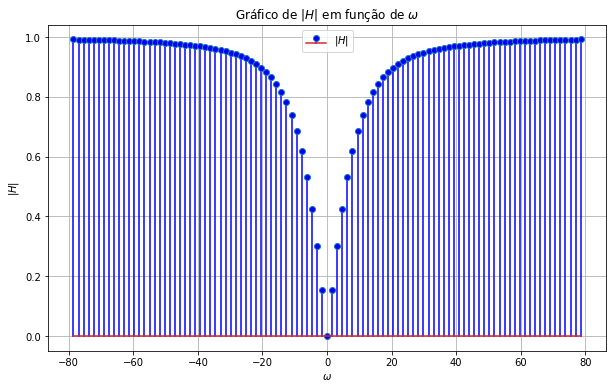

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


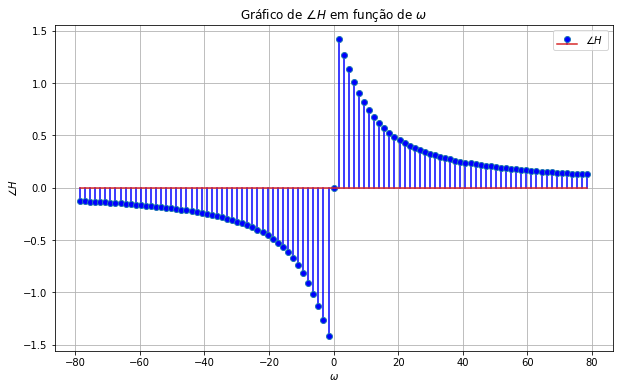

In [ ]:
R = 100*(10**(3))
C = 1*(10**(-6))
plot_H_w(R, C, 50)

## Discussão letra **(e)**

Observamos, através do circuito e dos gráficos, que temos um filtro passa alta. Onde frequências maiores que a de corte $\omega = \frac{1}{R*C} = \frac{1}{10^5*10^{-6}} = \frac{1}{10^{-1}} = 10$ "passam".

# **(f)**

Tendo como base os conceitos de autofunção e autovalor, mostre a forma de onda $y(t)$ observada na saída do sistema LIT do item **(e)** quando a entrada é a  onda “dente de serra” aproximada com N = 50. Comente a forma de onda obtida.

## Código

In [ ]:
def y_wave(R, C, N):
  '''
  Função que retorna a forma de onda y(t) observada na saída do sistema LIT do item (e)
  Input: número N de harmônicas e resposta em frequência H obtida na letra (e)
  Output: funçã y(t)
  '''
  j = np.complex(0,1)                                                   #criando o número complexo j
  T = 4                                                                 #período
  w_0 = 2*math.pi/T                                                     #Ômega zero
  
  #vamos recriar H aqui por conta dos índices negativos usados em H_circuit que não podemos usar aqui-----------------------------------|
  w_c = 1/(R*C)                                                         #valor de w_c com base nas entradas                             |
                                                                        #                                                               |
  w = []                                                                #vetor que conterá ω                                            |
  H = []                                                                #vetor que conterá as respostas em frequência                   |
                                                                        #                                                               |
  for k in range(2*N + 1):                                              #para cada k em um range de 2N por conta de índices negativos   |
    w.append(w_0*k)                                                     #w recebe w_0*k                                                 |
                                                                        #                                                               |
  for k in range(0, 2*N + 1):                                           #para cada k                                                    |
    if w[k] != 0:                                                       #se w[k] for diferente de zero                                  |
      H.append(1/(1-(j*(w_c/w[k]))))                                    #H recebe o valor conforme a equação dada no enunciado          |
    else:                                                               #se w[k] for igual a zero                                       |
      H.append(0)                                                       #H recebe zero                                                  |
  #-------------------------------------------------------------------------------------------------------------------------------------|

  t = np.arange(-2,2, 0.0002)                                           #número de amostras

  y = []                                                                #função y(t)

  for i in t:                                                           #para cada valor correspondente em t
    soma = 0                                                            #variável auxiliar para a soma
    for k in range(2*N + 1):                                            #para cada k no intervalo -N a N
      if k != 0:                                                        #se k diferente de zero
        soma += H[k]*(((j*(-1)**k)/(k*math.pi))*cmath.exp(j*k*w_0*i))   #precisamos do valor x(t) * H(jW)
    y.append(soma)                                                      #adicionamos esse valor em y

  
  #plot de y(t)
  plt.figure(figsize = (10,6))
  plt.plot(t, y, label = '$y(t)$', color = 'b')
  plt.legend()
  plt.xlabel('$t$')
  plt.ylabel('$y(t)$')
  plt.title('Gráfico de $y(t)$')
  plt.grid()
  plt.show()

  return y

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


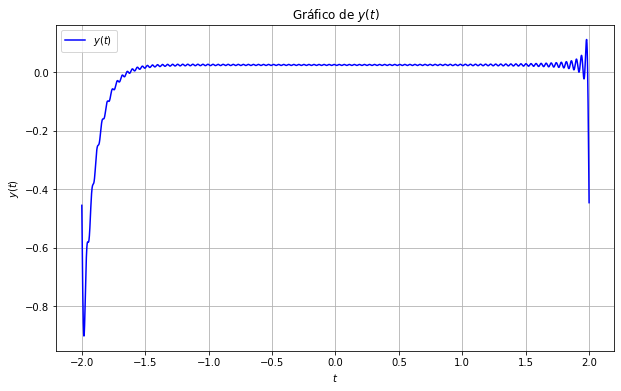

In [ ]:
R = 100*(10**(3))                     #resistência do enunciado
C = 1*(10**(-6))                      #capacitância do enunciado
N = 50                                #número de harmônicas

y = y_wave(R, C, N)

## Discussão letra **(f)**

Como dito na letra **(e)**, o filtro é do tipo passa alta, então apenas frequências altas poderão passar e, portanto, as formas de onda que são correspondentes aos primeiros coeficientes da Série de Fourier não passam, _i.e._, são eliminados. Vale ressaltar aqui também que em ambos os extremos de $y(t)$ há uma grande oscilação, tal fato se deve à descontinuidade da função Dente de Serra.

# **(g)**
(g) A Figura 3 mostra a resposta do sistema LIT do item **(e)** à onda Dente de Serra da Figura 1. Explique as diferenças entre o gráfico da Figura 3 e a resposta do sistema observada no item **(f)**.

![](https://drive.google.com/uc?export=view&id=1hFy_607lL7K75x81g_F-qIwbDHa3arBt)

Na representação da Série de Fourier, observa-se que há mais descontinuidades do que comparado à resposta do circuito da Figura 2 ao sinal Dente de Serra da Figura 1 e, também é possível observar variações menores (ou até nenhuma) nas extremidades.

As variações que aparecem na Série de Fourier são explicadas pelo Fenômeno de Gibbs, que ocorrem nas descontinuidades, já mencionado acima.